In [305]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy import stats

In [306]:
train_data=pd.read_csv("/Users/Esther/Desktop/IE/Courses/Machine Learning II/Assignments/Assignment 1/train.csv",
                      index_col="Id")
test_data=pd.read_csv("/Users/Esther/Desktop/IE/Courses/Machine Learning II/Assignments/Assignment 1/test.csv",
                      index_col="Id")

In [307]:
train_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Exploratory Data Analysis

In order to reduce the number of variables, we performed the Spearman correlation coefficient test. 

In [308]:
cor_matrix=pd.DataFrame(train_data.select_dtypes(include="integer").corr(method="spearman"))
cor_matrix.tail()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
PoolArea,0.033250,0.084460,0.056667,-0.005605,0.008986,0.002821,0.057586,0.068076,-0.036809,0.047067,...,0.050245,0.036890,0.003995,-0.008973,0.019035,1.000000,0.041544,-0.023295,-0.058132,0.058453
MiscVal,-0.032840,0.059297,-0.088019,0.086625,-0.091786,-0.090868,0.005097,0.030363,-0.044460,-0.061180,...,0.017017,-0.034794,0.038746,0.004980,0.015435,0.041544,1.000000,0.011075,0.057210,-0.062727
MoSold,0.018403,0.006423,0.061455,-0.007203,0.018621,0.021081,-0.016405,-0.025808,0.037116,0.030340,...,0.038058,0.066445,-0.028538,0.037039,0.023643,-0.023295,0.011075,1.000000,-0.150937,0.069432
YrSold,-0.027401,-0.027473,-0.025464,0.050214,-0.014100,0.045158,0.020793,0.026054,-0.038552,-0.016530,...,0.022937,-0.059019,0.000519,0.006790,0.023485,-0.058132,0.057210,-0.150937,1.000000,-0.029899
SalePrice,0.007192,0.456461,0.809829,-0.129325,0.652682,0.571159,0.301871,-0.038806,0.185197,0.602725,...,0.353802,0.477561,-0.218394,0.065440,0.100070,0.058453,-0.062727,0.069432,-0.029899,1.000000


In order to filter the numerical variables that are highly correlated with our target variable - SalePrice, we set the threshold of coefficient at 0.6. Then, we dropped the variables we want to use for feature extraction later from the relatively weakly correlated coefficients list, which is the "delete_2".


In [309]:
keep_1=cor_matrix.loc[abs(cor_matrix["SalePrice"])>=0.6,"SalePrice"].index
delete_2=cor_matrix.drop(["MSSubClass","PoolArea","MiscVal","YearBuilt","YrSold",'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch']).loc[abs(cor_matrix["SalePrice"])<0.6,"SalePrice"].index
delete_2

Index(['LotArea', 'OverallCond', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath',
       'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'MoSold'],
      dtype='object')

Below is the correlation matrix of the train dataset.

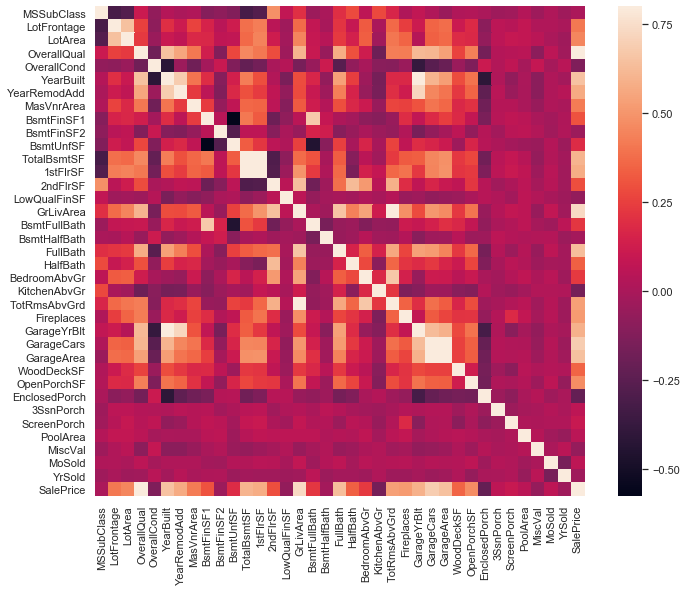

In [310]:
corrmat = train_data.corr(method="spearman")
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

Here we used the list that contains the variables correlated with SalePrice (keep_1) to plot a correlation heatmap. 

In [311]:
cor_plot_data=cor_matrix.loc[abs(cor_matrix["SalePrice"])>=0.6,keep_1]

[Text(0.5, 0, 'OverallQual'),
 Text(1.5, 0, 'YearBuilt'),
 Text(2.5, 0, 'TotalBsmtSF'),
 Text(3.5, 0, 'GrLivArea'),
 Text(4.5, 0, 'FullBath'),
 Text(5.5, 0, 'GarageCars'),
 Text(6.5, 0, 'GarageArea'),
 Text(7.5, 0, 'SalePrice')]

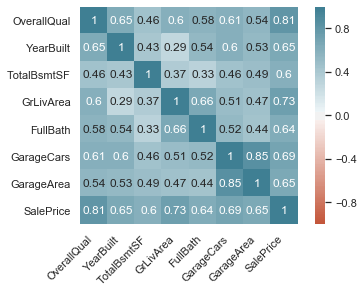

In [312]:
ax = sns.heatmap(
    cor_plot_data, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In order to avoid applying feature engineering twice, we added the "SalePrice" column to the test set and concatenated the test set with the train set.

In [313]:
test_add=test_data.copy()
test_add["SalePrice"]=pd.Series()
test_add.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,NaN
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,NaN
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,NaN
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,NaN
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,NaN


In [314]:
train_test_merge=pd.concat([train_data,test_add])
train_test_merge.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


# Feature Selection

Now that we have a complete merged dataset, we first removed the columns in the "delete_2" list. Afterwards, GarageArea was removed because it is highly correlated with GarageCars, which is also highly correlated with SalePrice. 

In [315]:
train_test_merge=train_test_merge.drop(delete_2 , axis='columns')

In [316]:
train_test_merge=train_test_merge.drop(["GarageArea"], axis='columns')
train_test_merge.head()

,MSSubClass,MSZoning,LotFrontage,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,NaN,NaN,NaN,0,2008,WD,Normal,208500.0
2,20,RL,80.0,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,NaN,NaN,NaN,0,2007,WD,Normal,181500.0
3,60,RL,68.0,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,NaN,NaN,NaN,0,2008,WD,Normal,223500.0
4,70,RL,60.0,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,NaN,NaN,NaN,0,2006,WD,Abnorml,140000.0
5,60,RL,84.0,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,NaN,NaN,NaN,0,2008,WD,Normal,250000.0


The following categorial variables - MSSubClass, Alley, GarageYrBlt, MasVnrType, MasVnrArea - were also removed because they were either correlated with another categorial variable or uncorrelated with our target variable. 

In [317]:
train_test_merge=train_test_merge.drop(["MSSubClass","Alley","GarageYrBlt","MasVnrType","MasVnrArea"], axis='columns')
train_test_merge.head()

,MSZoning,LotFrontage,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,65.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,0,0,NaN,NaN,NaN,0,2008,WD,Normal,208500.0
2,RL,80.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,0,0,NaN,NaN,NaN,0,2007,WD,Normal,181500.0
3,RL,68.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,0,0,NaN,NaN,NaN,0,2008,WD,Normal,223500.0
4,RL,60.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,0,0,NaN,NaN,NaN,0,2006,WD,Abnorml,140000.0
5,RL,84.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,0,0,NaN,NaN,NaN,0,2008,WD,Normal,250000.0


# Missing Value Imputation

In [318]:
train_test_merge.isnull().sum().sort_values(ascending=False)

PoolQC           2909
MiscFeature      2814
Fence            2348
SalePrice        1459
FireplaceQu      1420
LotFrontage       486
GarageCond        159
GarageFinish      159
GarageQual        159
GarageType        157
BsmtCond           82
BsmtExposure       82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MSZoning            4
Functional          2
Utilities           2
Exterior1st         1
SaleType            1
Exterior2nd         1
KitchenQual         1
GarageCars          1
Electrical          1
TotalBsmtSF         1
Condition2          0
RoofStyle           0
YearBuilt           0
OverallQual         0
HouseStyle          0
BldgType            0
PavedDrive          0
Condition1          0
RoofMatl            0
LandSlope           0
LotConfig           0
LandContour         0
LotShape            0
Street              0
Neighborhood        0
ExterCond           0
ExterQual           0
Foundation          0
YrSold              0
MiscVal             0
PoolArea  

Reading the data description file, we found out that the following variables have NAs, which actually means that such attribute just does not exist in the house. Therefore, we replaced those NAs with zeroes. 

In [319]:
train_test_merge[["PoolQC","MiscFeature","GarageCond","GarageQual","GarageFinish","GarageType","BsmtCond","Fence","FireplaceQu","BsmtQual","BsmtFinType1","BsmtFinType2","BsmtExposure","GarageCars","TotalBsmtSF"]]=train_test_merge[["PoolQC","MiscFeature","GarageCond","GarageQual","GarageFinish","GarageType","BsmtCond","Fence","FireplaceQu","BsmtQual","BsmtFinType1","BsmtFinType2","BsmtExposure","GarageCars","TotalBsmtSF"]].fillna(0)

In [320]:
train_test_merge.isna().sum().sort_values(ascending=False)

SalePrice        1459
LotFrontage       486
MSZoning            4
Utilities           2
Functional          2
SaleType            1
Electrical          1
Exterior2nd         1
Exterior1st         1
KitchenQual         1
YrSold              0
YearBuilt           0
BsmtQual            0
Foundation          0
ExterCond           0
ExterQual           0
RoofMatl            0
RoofStyle           0
OverallQual         0
BsmtExposure        0
HouseStyle          0
BldgType            0
Condition2          0
Condition1          0
Neighborhood        0
LandSlope           0
LotConfig           0
LandContour         0
LotShape            0
Street              0
BsmtCond            0
BsmtFinType2        0
BsmtFinType1        0
GarageCond          0
MiscFeature         0
Fence               0
PoolQC              0
PoolArea            0
ScreenPorch         0
3SsnPorch           0
EnclosedPorch       0
OpenPorchSF         0
WoodDeckSF          0
PavedDrive          0
GarageQual          0
MiscVal   

For the following categorial variables, we imputed their missing values with the most frequent value from each variable.

In [321]:
train_test_merge[["MSZoning","Functional","Utilities","Electrical","SaleType","Exterior2nd","Exterior1st","KitchenQual"]]=train_test_merge[["MSZoning","Functional","Utilities","Electrical","SaleType","Exterior2nd","Exterior1st","KitchenQual"]].apply(lambda x:x.fillna(x.value_counts().index[0]))

In [322]:
train_test_merge.isna().sum().sort_values(ascending=False)

SalePrice        1459
LotFrontage       486
YearBuilt           0
BsmtFinType1        0
BsmtExposure        0
BsmtCond            0
BsmtQual            0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
OverallQual         0
TotalBsmtSF         0
HouseStyle          0
BldgType            0
Condition2          0
Condition1          0
Neighborhood        0
LandSlope           0
LotConfig           0
Utilities           0
LandContour         0
LotShape            0
Street              0
BsmtFinType2        0
Heating             0
SaleCondition       0
HeatingQC           0
SaleType            0
YrSold              0
MiscVal             0
MiscFeature         0
Fence               0
PoolQC              0
PoolArea            0
ScreenPorch         0
3SsnPorch           0
EnclosedPorch       0
OpenPorchSF         0
WoodDeckSF          0
PavedDrive          0
GarageCond          0
GarageQual

We discovered that each neighbourhood has similar LotFrontage values. Therefore, we decided to impute missing values based on neighbourhood and using median as there are some outliers.

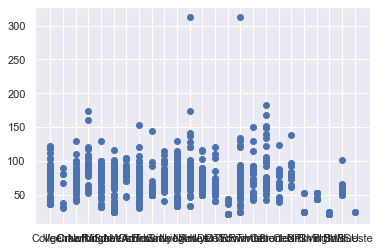

In [323]:
plt.scatter(train_data["Neighborhood"],train_data["LotFrontage"])

In [324]:
train_test_merge["LotFrontage"]=train_test_merge.groupby("Neighborhood")["LotFrontage"].transform(lambda x:x.fillna(x.median()))

We can confirm that there are no more missing values in our dataset (except SalePrice in test set).

In [325]:
train_test_merge.isna().sum().sort_values(ascending=False)

SalePrice        1459
TotalBsmtSF         0
BsmtFinType1        0
BsmtExposure        0
BsmtCond            0
BsmtQual            0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
OverallQual         0
HouseStyle          0
BldgType            0
Condition2          0
Condition1          0
Neighborhood        0
LandSlope           0
LotConfig           0
Utilities           0
LandContour         0
LotShape            0
Street              0
LotFrontage         0
BsmtFinType2        0
Heating             0
SaleCondition       0
HeatingQC           0
SaleType            0
YrSold              0
MiscVal             0
MiscFeature         0
Fence               0
PoolQC              0
PoolArea            0
ScreenPorch         0
3SsnPorch           0
EnclosedPorch       0
OpenPorchSF         0
WoodDeckSF          0
PavedDrive          0
GarageCond          0
GarageQual

# Remove Outliers

In order to detect outliers for numerical values, we plotted pairplot of them. As shown in the graphs, there are outliers in SalePrice, LotFrontage, GrLivArea, and TotalBsmtSF. Although it seems that MiscVal and PoolArea have outliers, this is not true as approximately 90% of their values are 0; thus, outliers not applicable. 

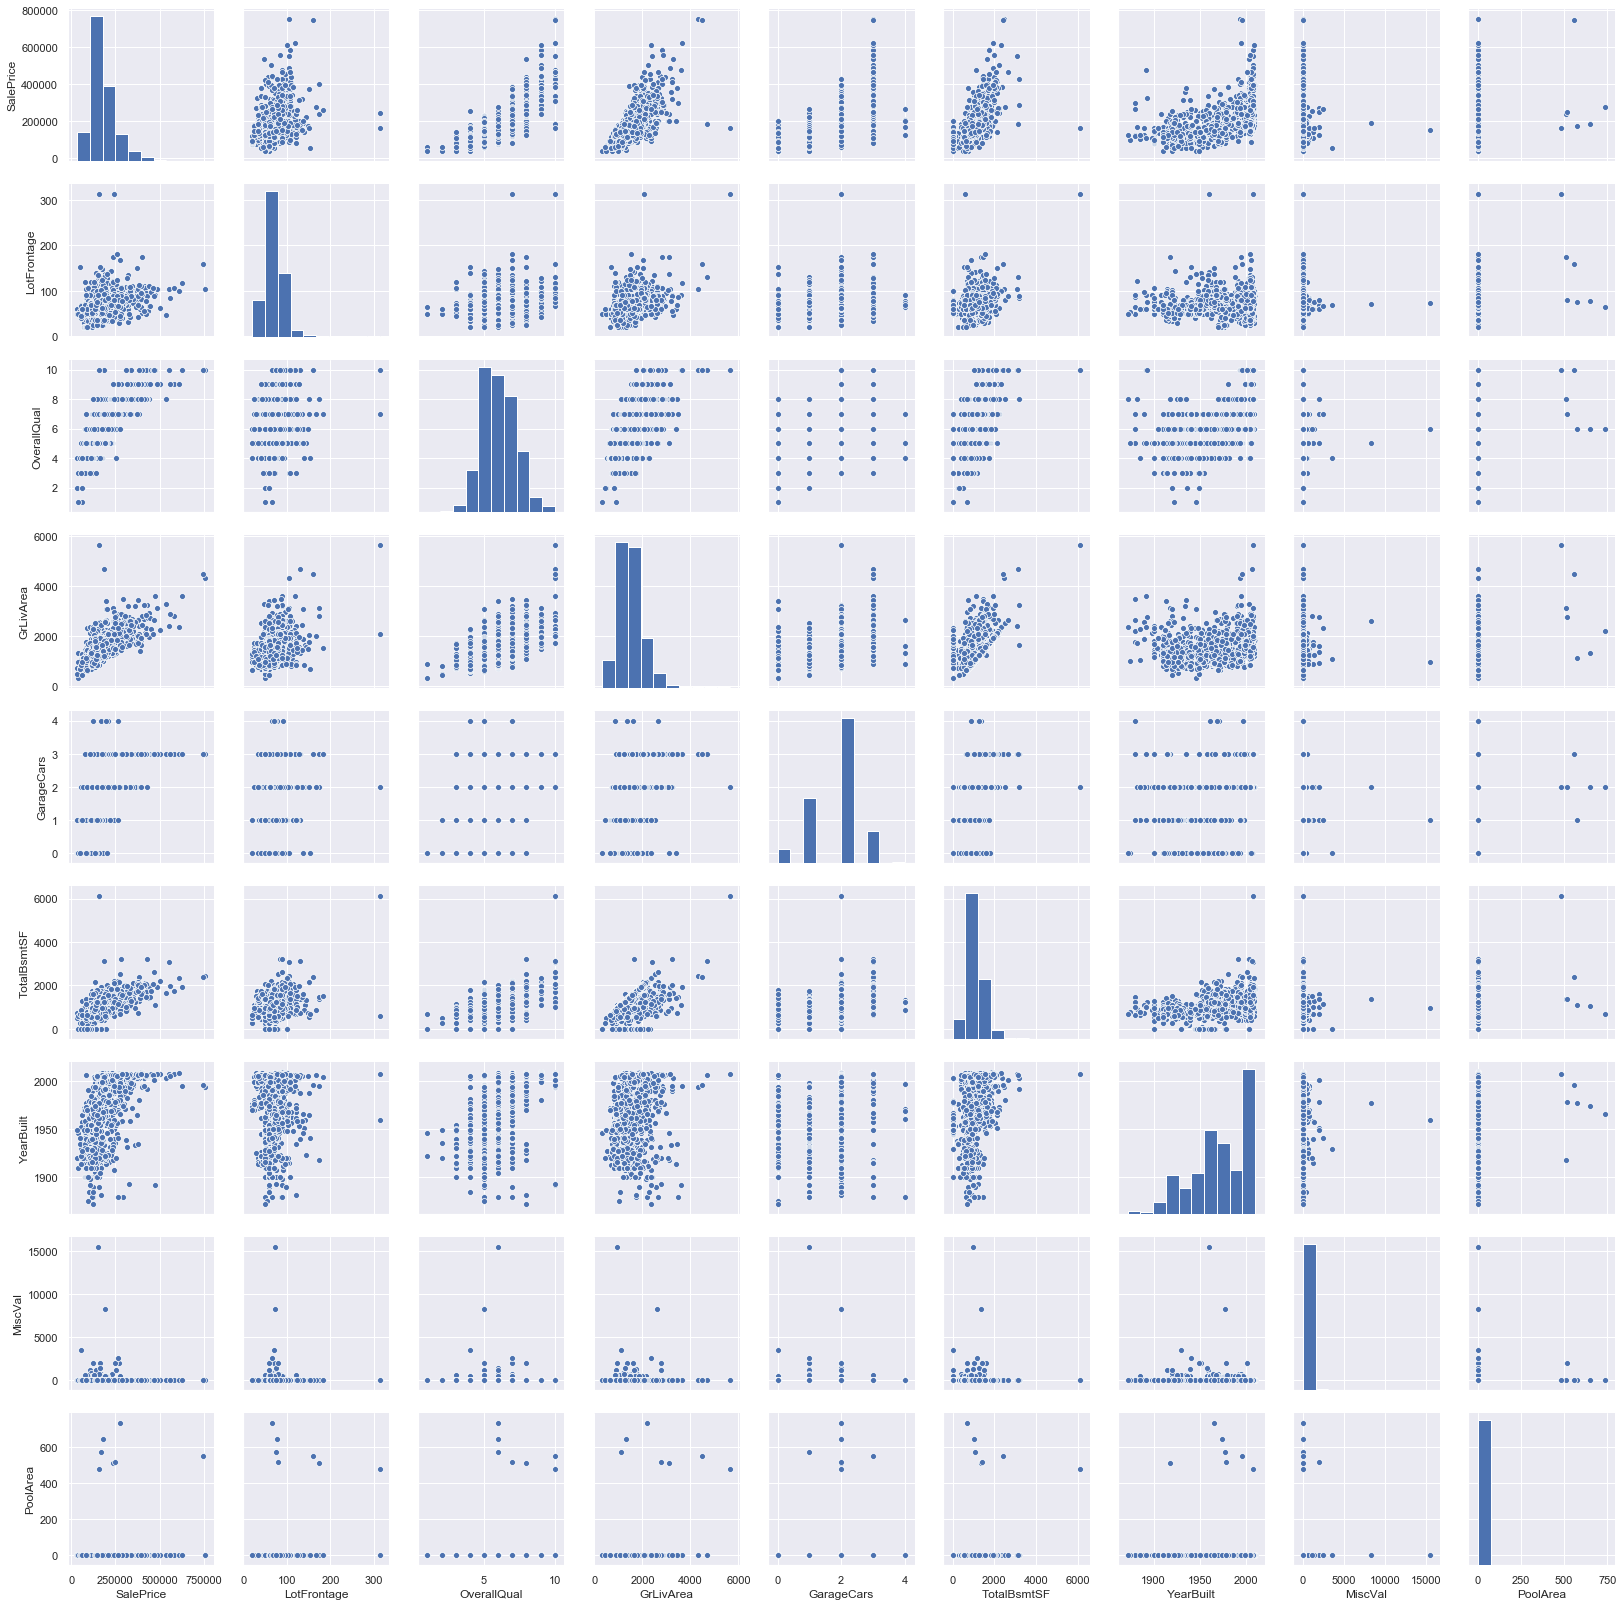

In [326]:
sns.set()
cols = ['SalePrice','LotFrontage', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',  'YearBuilt','MiscVal','PoolArea']
sns.pairplot(train_test_merge[0:1460][cols], height = 2.5)
plt.show()

We used the IQR score to remove outliers. We set the outlier size parameter as 4, which removed 14 rows in total.

In [327]:
Q1 = train_test_merge[0:1460][["SalePrice","LotFrontage","GrLivArea","TotalBsmtSF"]].quantile(0.25)
Q3 = train_test_merge[0:1460][["SalePrice","LotFrontage","GrLivArea","TotalBsmtSF"]].quantile(0.75)
IQR = Q3 - Q1
print(IQR,Q1,Q3)

SalePrice      84025.00
LotFrontage       20.00
GrLivArea        647.25
TotalBsmtSF      502.50
dtype: float64 SalePrice      129975.00
LotFrontage        60.00
GrLivArea        1129.50
TotalBsmtSF       795.75
Name: 0.25, dtype: float64 SalePrice      214000.00
LotFrontage        80.00
GrLivArea        1776.75
TotalBsmtSF      1298.25
Name: 0.75, dtype: float64


In [328]:
idx = ((train_test_merge[0:1460][["SalePrice","LotFrontage","GrLivArea","TotalBsmtSF"]]>= (Q1 - 4 * IQR)) & (train_test_merge[0:1460][["SalePrice","LotFrontage","GrLivArea","TotalBsmtSF"]] <= (Q3 + 4 * IQR))).all(axis=1)

In [329]:
train_test_merge=pd.concat([train_test_merge[0:1460].loc[idx],train_test_merge[1460:]])

In [330]:
train_test_merge

,MSZoning,LotFrontage,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,65.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,0,0,0,0,0,0,2008,WD,Normal,208500.0
2,RL,80.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,0,0,0,0,0,0,2007,WD,Normal,181500.0
3,RL,68.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,0,0,0,0,0,0,2008,WD,Normal,223500.0
4,RL,60.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,0,0,0,0,0,0,2006,WD,Abnorml,140000.0
5,RL,84.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,0,0,0,0,0,0,2008,WD,Normal,250000.0
6,RL,85.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,0,0,0,MnPrv,Shed,700,2009,WD,Normal,143000.0
7,RL,75.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,...,0,0,0,0,0,0,2007,WD,Normal,307000.0
8,RL,80.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,...,0,0,0,0,Shed,350,2009,WD,Normal,200000.0
9,RM,51.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,...,0,0,0,0,0,0,2008,WD,Abnorml,129900.0


# Feature Extraction & Feature Engineering

In feature extraction, we created 3 features: Age_built, Total_area, and porch_area. 
We created Age_built feature, because the age of a house at the time of the sale is more important for the sale price rather than when it was built or sold. 
With the same logic, we created Total_area and porch_area as the total square feet is more relevant than the individual area size. 

In [331]:
train_test_merge["Age_built"]=train_test_merge["YrSold"]-train_test_merge["YearBuilt"]

In [332]:
train_test_merge["Total_area"]=train_test_merge["GrLivArea"]+train_test_merge["TotalBsmtSF"]

In [333]:
train_test_merge["porch_area"]=train_test_merge["WoodDeckSF"]+train_test_merge["OpenPorchSF"]+train_test_merge["EnclosedPorch"]+train_test_merge["3SsnPorch"]+train_test_merge["ScreenPorch"]

In [334]:
train_test_merge=train_test_merge.drop(["YrSold","YearBuilt","GrLivArea","TotalBsmtSF","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch"],axis=1)

In [335]:
train_test_merge.head()

,MSZoning,LotFrontage,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,Age_built,Total_area,porch_area
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,65.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,0,0,0,0,WD,Normal,208500.0,5,2566.0,61
2,RL,80.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,0,0,0,0,WD,Normal,181500.0,31,2524.0,298
3,RL,68.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,0,0,0,0,WD,Normal,223500.0,7,2706.0,42
4,RL,60.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,0,0,0,0,WD,Abnorml,140000.0,91,2473.0,307
5,RL,84.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,0,0,0,0,WD,Normal,250000.0,8,3343.0,276


For numerical values, it is imperative for them to be transformed if they are skewed as they can make our model biased. Below is the skewness values and plots of numerical values including our target variable, SalePrice.

In [336]:
skew(train_test_merge.loc[0:1460][["SalePrice","LotFrontage","MiscVal","Total_area","porch_area"]])

array([ 1.28285068,  0.31728191, 24.33431257,  0.58583903,  1.11646863])

As you can see, the most distorted variables are SalePrice, MiscVal, and porch_area. However, MiscVal is distorted due to its majority of values being zeroes. 

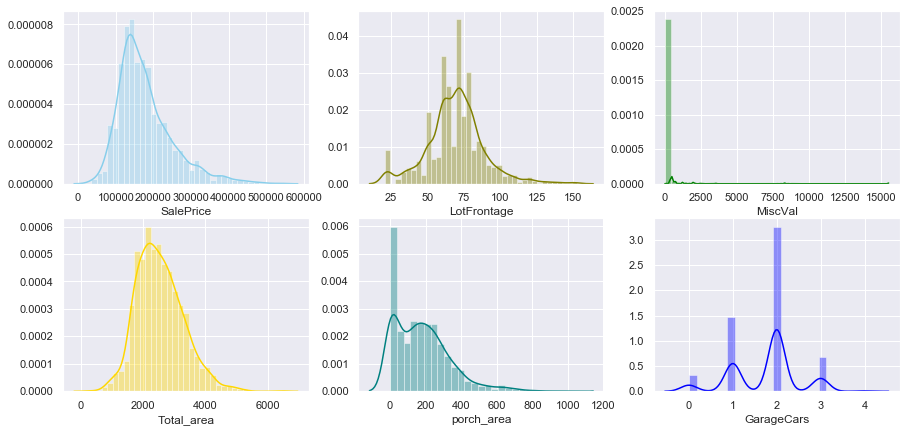

In [337]:
f, axes = plt.subplots(2, 3, figsize=(15, 7), sharex=False,sharey=False)
sns.distplot(train_test_merge.loc[0:1460]["SalePrice"], color="skyblue", ax=axes[0,0])
sns.distplot(train_test_merge.loc[0:1460]["LotFrontage"], color="olive", ax=axes[0,1])
sns.distplot(train_test_merge.loc[0:1460]["MiscVal"], color="green", ax=axes[0,2])
sns.distplot(train_test_merge.loc[0:1460]["Total_area"], color="gold", ax=axes[1,0])
sns.distplot(train_test_merge.loc[0:1460]["porch_area"], color="teal", ax=axes[1,1])
sns.distplot(train_test_merge.loc[0:1460]["GarageCars"], color="blue", ax=axes[1,2])

Therefore, we transformed the SalePrice with log1p, and porch_area with sqaure root. The skewness of the two variables now has decreased closer to 0.

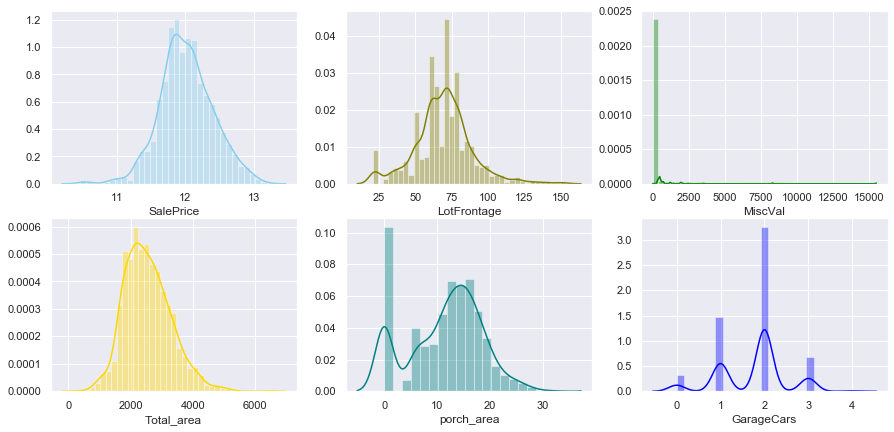

In [338]:
f, axes = plt.subplots(2, 3, figsize=(15, 7), sharex=False,sharey=False)
sns.distplot(np.log1p(train_test_merge.loc[0:1460]["SalePrice"]), color="skyblue", ax=axes[0,0])
sns.distplot(train_test_merge.loc[0:1460]["LotFrontage"], color="olive", ax=axes[0,1])
sns.distplot(train_test_merge.loc[0:1460]["MiscVal"], color="green", ax=axes[0,2])
sns.distplot(train_test_merge.loc[0:1460]["Total_area"], color="gold", ax=axes[1,0])
sns.distplot(np.sqrt(train_test_merge.loc[0:1460]["porch_area"]), color="teal", ax=axes[1,1])
sns.distplot(train_test_merge.loc[0:1460]["GarageCars"], color="blue", ax=axes[1,2])

In [339]:
skew(np.log1p(train_test_merge.loc[0:1460][["SalePrice"]]))

array([-0.01272562])

In [340]:
skew(np.sqrt(train_test_merge.loc[0:1460]["porch_area"]))

-0.27103393011126603

In [341]:
train_test_merge[["SalePrice"]]=np.log1p(train_test_merge.loc[0:1460][["SalePrice"]])

In [342]:
train_test_merge[["porch_area"]]=np.sqrt(train_test_merge[["porch_area"]])
train_test_merge.head()

,MSZoning,LotFrontage,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,Age_built,Total_area,porch_area
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,65.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,0,0,0,0,WD,Normal,12.247699,5,2566.0,7.810250
2,RL,80.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,0,0,0,0,WD,Normal,12.109016,31,2524.0,17.262677
3,RL,68.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,0,0,0,0,WD,Normal,12.317171,7,2706.0,6.480741
4,RL,60.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,0,0,0,0,WD,Abnorml,11.849405,91,2473.0,17.521415
5,RL,84.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,0,0,0,0,WD,Normal,12.429220,8,3343.0,16.613248


In [343]:
# Dummy Encoding for all remaining categorial variables

In [344]:
df_dummy = pd.get_dummies(train_test_merge.select_dtypes(include="object"))
df_dummy.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0
5,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [345]:
train_test_with_dummy=train_test_merge.merge(
  df_dummy,
  left_on="Id",
  right_on="Id",
  how="left",
)
train_test_with_dummy.head()

,MSZoning,LotFrontage,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,65.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,0,0,0,1,0,0,0,0,1,0
2,RL,80.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,0,0,0,1,0,0,0,0,1,0
3,RL,68.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,0,0,0,1,0,0,0,0,1,0
4,RL,60.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,0,0,0,1,1,0,0,0,0,0
5,RL,84.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,0,0,0,1,0,0,0,0,1,0


In [346]:
train_test_model1=train_test_with_dummy.select_dtypes(exclude="object")
train_test_model1.head()

,LotFrontage,OverallQual,FullBath,GarageCars,PoolArea,MiscVal,SalePrice,Age_built,Total_area,porch_area,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,7,2,2.0,0,0,12.247699,5,2566.0,7.810250,...,0,0,0,1,0,0,0,0,1,0
2,80.0,6,2,2.0,0,0,12.109016,31,2524.0,17.262677,...,0,0,0,1,0,0,0,0,1,0
3,68.0,7,2,2.0,0,0,12.317171,7,2706.0,6.480741,...,0,0,0,1,0,0,0,0,1,0
4,60.0,7,1,3.0,0,0,11.849405,91,2473.0,17.521415,...,0,0,0,1,1,0,0,0,0,0
5,84.0,8,2,3.0,0,0,12.429220,8,3343.0,16.613248,...,0,0,0,1,0,0,0,0,1,0


# Splitting into Train 1 and Test 1 Set

In [347]:
train_model1=train_test_model1.loc[1:1460,]
test_model1=train_test_model1.loc[1461:,]

In [348]:
train_model1.head()

,LotFrontage,OverallQual,FullBath,GarageCars,PoolArea,MiscVal,SalePrice,Age_built,Total_area,porch_area,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,7,2,2.0,0,0,12.247699,5,2566.0,7.810250,...,0,0,0,1,0,0,0,0,1,0
2,80.0,6,2,2.0,0,0,12.109016,31,2524.0,17.262677,...,0,0,0,1,0,0,0,0,1,0
3,68.0,7,2,2.0,0,0,12.317171,7,2706.0,6.480741,...,0,0,0,1,0,0,0,0,1,0
4,60.0,7,1,3.0,0,0,11.849405,91,2473.0,17.521415,...,0,0,0,1,1,0,0,0,0,0
5,84.0,8,2,3.0,0,0,12.429220,8,3343.0,16.613248,...,0,0,0,1,0,0,0,0,1,0


# Model Training 1

In [349]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Our first model was trained using a simple linear regression. 

In [350]:
 X_train, X_val, y_train, y_val= train_test_split(train_model1.drop("SalePrice",axis=1), train_model1["SalePrice"], test_size=0.2, random_state=1)

In [351]:
model1 = LinearRegression().fit(X_train, y_train)

In [352]:
model1.score(X_train, y_train)

0.9338499523116486

In [353]:
model1.score(X_val, y_val)

0.8834696352235422

In [354]:
model1.intercept_

10.219202190294785

In [355]:
model1.coef_

array([ 3.19713824e-04,  4.07910965e-02,  5.09788320e-03,  4.49889340e-02,
        1.29108292e-03,  6.87685415e-05, -7.31056351e-04,  1.97354132e-04,
        2.51947187e-03, -3.99805612e-01,  1.30462831e-01,  1.29982133e-01,
        9.77663405e-02,  4.15943078e-02,  1.05133003e-02, -1.05133003e-02,
       -7.62939488e-03,  1.26289846e-02,  9.09005506e-03, -1.40896447e-02,
       -8.05807426e-03, -4.10694432e-03,  3.17374174e-03,  8.99127684e-03,
       -3.66234820e-14,  5.10529119e-15,  1.51769279e-02,  4.44065243e-02,
       -3.15809886e-02, -2.71457128e-02, -8.56750795e-04, -1.64820884e-02,
        2.42309758e-02, -7.74888747e-03, -3.68254721e-02, -7.57006293e-03,
       -6.69730794e-02,  7.77690582e-02,  2.58976723e-02, -2.86392418e-02,
        1.50878420e-01, -5.82190187e-02, -3.16636988e-02,  1.37575069e-02,
       -1.71923293e-01, -4.50884181e-02, -3.95740472e-02,  1.33691594e-02,
       -2.13826801e-02,  3.27702171e-02,  4.63031956e-02, -2.81388685e-02,
        3.38083054e-02, -

In [356]:
y_pred_val1=model1.predict(X_val)

In [357]:
y_pred_test1=model1.predict(test_model1.drop("SalePrice",axis=1))
y_pred_test1

array([11.66191725, 11.89531001, 12.11131998, ..., 11.91487995,
       11.64258619, 12.27973108])

In [358]:
y_pred_train1=model1.predict(X_train)

In [359]:
# Evaluation

In [360]:
from sklearn import metrics 

In [361]:
print(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train1)))
print(np.sqrt(metrics.mean_squared_error(y_val, y_pred_val1)))

0.09922704927491964
0.13675392900014505


In [362]:
sub1=pd.DataFrame()
sub1["Id"]=test_model1.index
sub1["SalePrice"]=np.expm1(y_pred_test1)

In [448]:
sub1.to_csv('/Users/Esther/Desktop/IE/Courses/Machine Learning II/Assignments/Assignment 1/submission1.csv',index=False)

In [364]:
# Feature selection for the second model - Chi-Square Test

In [365]:
from scipy.stats import chi2_contingency
import scipy.stats as stats

In [366]:
class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)

#Initialize ChiSquare Class
cT = ChiSquare(train_test_merge.loc[1:1460])

#Feature Selection
testColumns = train_test_merge.loc[1:1460].select_dtypes(include="object").columns
for var in testColumns:
    cT.TestIndependence(colX=var,colY="SalePrice" ) 

MSZoning is IMPORTANT for Prediction
Street is IMPORTANT for Prediction
LotShape is IMPORTANT for Prediction
LandContour is NOT an important predictor. (Discard LandContour from model)
Utilities is NOT an important predictor. (Discard Utilities from model)
LotConfig is IMPORTANT for Prediction
LandSlope is NOT an important predictor. (Discard LandSlope from model)
Neighborhood is IMPORTANT for Prediction
Condition1 is NOT an important predictor. (Discard Condition1 from model)
Condition2 is NOT an important predictor. (Discard Condition2 from model)
BldgType is NOT an important predictor. (Discard BldgType from model)
HouseStyle is NOT an important predictor. (Discard HouseStyle from model)
RoofStyle is NOT an important predictor. (Discard RoofStyle from model)
RoofMatl is NOT an important predictor. (Discard RoofMatl from model)
Exterior1st is NOT an important predictor. (Discard Exterior1st from model)
Exterior2nd is NOT an important predictor. (Discard Exterior2nd from model)
ExterQ

The Chi-Square Test helped us to identify which categorial variables are not relevant for predicing our target variable. From the list, we selected irrelevant variables according to our business understanding of the dataset and deleted.

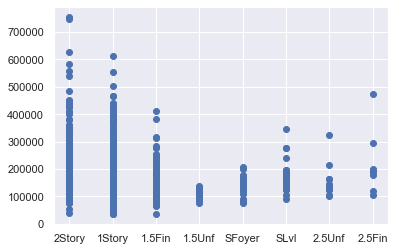

In [367]:
plt.scatter(train_data["HouseStyle"],train_data["SalePrice"])

Below is the list of irrelevant cateogrical variables we removed.

In [368]:
train_test_model2=train_test_merge.drop(["Utilities","RoofStyle","Functional","Fence","RoofMatl","GarageCond","Condition1","Condition2","Exterior1st","Exterior2nd","BldgType","BsmtFinType1","BsmtFinType2","MiscVal","HouseStyle","PoolQC"],axis=1)

For the remaining variables, we either transformed them into binary variables or ordinal variables.

In [369]:
train_test_model2["LotShape"]=(train_test_model2["LotShape"]=="Reg")*1

In [370]:
train_test_model2["LandSlope"]=(train_test_model2["LandSlope"]=="Gentle slope")*1

In [371]:
train_test_model2["LandContour"]=(train_test_model2["LandContour"]=="Lvl")*1

In [372]:
train_test_model2["PavedDrive"]=(train_test_model2["PavedDrive"]=="Y")*1

In [373]:
train_test_model2["MiscFeature"]=(train_test_model2["MiscFeature"]!=0)*1

In [374]:
train_test_model2["Electrical"]=(train_test_model2["Electrical"]=="SBrkr")*1

In [375]:
qc1_dict = {"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
train_test_model2["HeatingQC"] = train_test_model2["HeatingQC"].map(qc1_dict).astype(int)
train_test_model2["ExterQual"] = train_test_model2["ExterQual"].map(qc1_dict).astype(int)
train_test_model2["ExterCond"] = train_test_model2["ExterCond"].map(qc1_dict).astype(int)
train_test_model2["KitchenQual"] = train_test_model2["KitchenQual"].map(qc1_dict).astype(int)
qc2_dict = {0 : 0,"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
train_test_model2["BsmtQual"] = train_test_model2["BsmtQual"].map(qc2_dict).astype(int)
train_test_model2["BsmtCond"] = train_test_model2["BsmtCond"].map(qc2_dict).astype(int)
train_test_model2["FireplaceQu"] = train_test_model2["FireplaceQu"].map(qc2_dict).astype(int)
train_test_model2["GarageQual"] = train_test_model2["GarageQual"].map(qc2_dict).astype(int)
qc3_dict = {0 : 0,"No": 1, "Mn": 2, "Av": 3, "Gd": 4}
train_test_model2["BsmtExposure"] = train_test_model2["BsmtExposure"].map(qc3_dict).astype(int)

In [376]:
# Another dummy encoding step for the variables after the new feature transformation.

In [377]:
df_dummy2=pd.get_dummies(train_test_model2.select_dtypes(include="object"))
df_dummy.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0
5,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [378]:
train_test_with_dummy2=train_test_model2.merge(
  df_dummy2,
  left_on="Id",
  right_on="Id",
  how="left",
)

In [449]:
train_test_with_dummy2=train_test_with_dummy2.select_dtypes(exclude="object")
train_test_with_dummy2.head()

,LotFrontage,LotShape,LandContour,LandSlope,OverallQual,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,1,1,0,7,4,3,4,3,1,...,0,0,0,1,0,0,0,0,1,0
2,80.0,1,1,0,6,3,3,4,3,4,...,0,0,0,1,0,0,0,0,1,0
3,68.0,0,1,0,7,4,3,4,3,2,...,0,0,0,1,0,0,0,0,1,0
4,60.0,0,1,0,7,3,3,3,4,1,...,0,0,0,1,1,0,0,0,0,0
5,84.0,0,1,0,8,4,3,4,3,3,...,0,0,0,1,0,0,0,0,1,0


# Splitting into Train 2 and Test 2 set

In [380]:
train_model2=train_test_with_dummy2.loc[1:1460,]
test_model2=train_test_with_dummy2.loc[1461:,]

In [381]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [382]:
 X_train2, X_val2, y_train2, y_val2= train_test_split(train_model2.drop("SalePrice",axis=1), train_model2["SalePrice"], test_size=0.2, random_state=1)

In [383]:
model2 = LinearRegression().fit(X_train2, y_train2)

In [384]:
model2.score(X_train2, y_train2)

0.9084397491531311

In [385]:
model2.score(X_val2, y_val2)

0.8870901150535251

In [386]:
model2.intercept_

10.378560502514967

In [387]:
model2.coef_

array([ 5.72996035e-04, -5.56778210e-03, -7.35734843e-03,  3.13662291e-12,
        5.30441422e-02, -4.49715108e-04,  3.31569970e-02,  3.76843458e-03,
        6.21971322e-04,  2.05303787e-02,  2.35873318e-02, -1.17160509e-02,
        7.09192149e-03,  5.08962597e-02,  7.85449386e-03,  5.12405986e-02,
        5.29248462e-02,  2.45372567e-02,  3.01580847e-04,  1.63481139e-02,
       -6.45906497e-04,  1.86624820e-04,  2.89954159e-03, -3.61454414e-01,
        1.65916727e-01,  9.44710988e-02,  9.16915713e-02,  9.37501694e-03,
        2.40142940e-04, -2.40142940e-04,  4.56475886e-03,  5.41022958e-02,
       -1.62668678e-02, -4.65277342e-02,  4.12754739e-03, -1.21242026e-01,
        1.23898002e-02, -4.06650525e-02,  7.68016579e-02,  4.00186403e-02,
       -1.96648591e-02,  1.55758176e-01, -4.83985827e-02, -1.67710124e-02,
       -8.28851614e-03, -1.17758867e-01, -3.41861566e-02, -3.61778518e-02,
       -8.27222898e-03, -9.88616776e-03,  7.02524154e-02,  4.83922844e-02,
       -9.36067440e-03,  

In [388]:
y_pred_val2=model2.predict(X_val2)


In [389]:
y_pred_test2=model2.predict(test_model2.drop("SalePrice",axis=1))
y_pred_test2

array([11.68847125, 11.98815286, 12.02223633, ..., 11.88682752,
       11.6606465 , 12.30241309])

In [390]:
y_pred_train2=model2.predict(X_train2)

In [391]:
print(np.sqrt(metrics.mean_squared_error(y_train2, y_pred_train2)))
print(np.sqrt(metrics.mean_squared_error(y_val2, y_pred_val2)))

0.11673967583006088
0.13461276413008547


In [392]:
sub2=pd.DataFrame()
sub2["Id"]=test_model2.index
sub2["SalePrice"]=np.expm1(y_pred_test2)

In [414]:
sub2.to_csv('/Users/Esther/Desktop/IE/Courses/Machine Learning II/Assignments/Assignment 1/submission2.csv',index=False)

In [394]:
# Feature Selection with the third model - PCA

In [395]:
from sklearn.preprocessing import StandardScaler

# Separating out the features
x = train_test_with_dummy2.drop("SalePrice",axis=1)
# Separating out the target
y = train_test_with_dummy2.loc[:,['SalePrice']]
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [396]:
train_test_with_dummy2

,LotFrontage,LotShape,LandContour,LandSlope,OverallQual,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,1,1,0,7,4,3,4,3,1,...,0,0,0,1,0,0,0,0,1,0
2,80.0,1,1,0,6,3,3,4,3,4,...,0,0,0,1,0,0,0,0,1,0
3,68.0,0,1,0,7,4,3,4,3,2,...,0,0,0,1,0,0,0,0,1,0
4,60.0,0,1,0,7,3,3,3,4,1,...,0,0,0,1,1,0,0,0,0,0
5,84.0,0,1,0,8,4,3,4,3,3,...,0,0,0,1,0,0,0,0,1,0
6,85.0,0,1,0,5,3,3,4,3,1,...,0,0,0,1,0,0,0,0,1,0
7,75.0,1,1,0,8,4,3,5,3,3,...,0,0,0,1,0,0,0,0,1,0
8,80.0,0,1,0,7,3,3,4,3,2,...,0,0,0,1,0,0,0,0,1,0
9,51.0,1,1,0,7,3,3,3,3,1,...,0,0,0,1,1,0,0,0,0,0


In [397]:
from sklearn.decomposition import PCA
pca = PCA(n_components=85) #selecting the number of components
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents,index=train_test_with_dummy2.index)

In [451]:
# Concatenating the PCA table with SalePrice
train_test_model3 = pd.concat([principalDf,train_test_with_dummy2["SalePrice"]],axis=1,ignore_index=True)
train_test_model3.head()

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
Id,,,,,,,,,,,,,,,,,,,,,
1,-2.290358,-0.338418,0.226473,0.225336,-1.539949,-1.190131,1.318107,0.905965,-0.540613,-0.776370,...,-0.124950,-0.210004,-0.062673,0.004863,0.028683,-0.085128,0.063943,-0.129166,-0.080807,12.247699
2,-1.421907,-2.126780,1.292795,0.721015,-0.418204,0.705876,-0.183946,1.637185,1.825298,0.323699,...,-0.047437,0.999146,0.128447,-0.298582,-0.349268,-0.373247,0.212519,-0.179234,0.087730,12.109016
3,-2.897272,-0.456386,0.554429,0.741851,-1.211660,-0.745410,0.939436,0.713935,-0.501523,-0.451985,...,0.121855,0.058123,-0.233482,-0.124039,0.140345,-0.036744,0.073921,-0.146429,-0.041368,12.317171
4,0.856741,0.085963,-2.013045,0.904613,2.461169,1.927565,-2.746797,-0.932118,1.953536,-0.860358,...,-1.112024,0.052539,1.772413,-0.346277,0.740731,-0.751453,-0.889846,-0.152903,0.388744,11.849405
5,-4.134531,-0.635654,0.923705,2.439423,-0.374459,-0.169872,0.634650,0.695640,2.007336,-0.859505,...,0.167734,0.164591,0.435229,-0.135910,0.204181,-0.411200,-0.207153,-0.037438,-0.116724,12.429220


# Spilitting into Train 3 and Test 3 Set

In [399]:
train_model3=train_test_model3.loc[1:1460,]
test_model3=train_test_model3.loc[1461:,]

# Model Training 3

In [400]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [401]:
 X_train3, X_val3, y_train3, y_val3= train_test_split(train_model3.iloc[:,:-1], train_model3.iloc[:,-1], test_size=0.2, random_state=1)

In [402]:
model3 = LinearRegression().fit(X_train3, y_train3)

In [403]:
model3.score(X_train3, y_train3)

0.9073385661109937

In [404]:
model3.score(X_val3, y_val3)

0.8877517174424935

In [405]:
model3.intercept_

12.012325878933305

In [406]:
model3.coef_

array([-0.10738529, -0.00021358, -0.00534245,  0.04640116,  0.02001553,
        0.00881591, -0.02210247,  0.01324982, -0.00673328, -0.02781393,
        0.0378116 , -0.00334574, -0.02716402, -0.02319885,  0.00815446,
       -0.01019592, -0.01502507,  0.02254474, -0.02221415,  0.0108835 ,
       -0.00484152,  0.01005897,  0.00870849,  0.01233291,  0.00623776,
       -0.00515264, -0.01360978,  0.00215059, -0.00040224,  0.00258538,
        0.0011266 , -0.00015788, -0.01545448, -0.0055541 , -0.0106927 ,
       -0.00535983, -0.00208746,  0.00373612,  0.00680193, -0.00285532,
       -0.0056662 , -0.01094303, -0.00168007,  0.00433382, -0.01021752,
        0.00494924,  0.00575633,  0.00738699, -0.00738141,  0.00763975,
       -0.00247405,  0.00098382, -0.00774412, -0.00601985, -0.00796799,
        0.00783416, -0.02038144,  0.03349288,  0.00156622,  0.00028865,
        0.01330692,  0.02398858,  0.00618555, -0.01009139,  0.0219673 ,
        0.00988452, -0.01335   ,  0.00463349, -0.00746474,  0.01

In [407]:
y_pred_val3=model3.predict(X_val3)


In [408]:
y_pred_test3=model3.predict(test_model3.iloc[:,:-1])
y_pred_test3

array([11.6901905 , 11.98409881, 12.02432513, ..., 11.88531658,
       11.65274765, 12.30471635])

In [409]:
y_pred_train3=model3.predict(X_train3)

In [410]:
print(np.sqrt(metrics.mean_squared_error(y_train3, y_pred_train3)))
print(np.sqrt(metrics.mean_squared_error(y_val3, y_pred_val3)))

0.11743958402400653
0.1342177988295379


In [411]:
sub3=pd.DataFrame()
sub3["Id"]=test_model3.index
sub3["SalePrice"]=np.expm1(y_pred_test3)

In [415]:
sub3.to_csv('/Users/Esther/Desktop/IE/Courses/Machine Learning II/Assignments/Assignment 1/submission3.csv',index=False)

# Model Training 4 with Ridge

In [417]:
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

In [418]:
model4 = Ridge(alpha=0.1)
model4.fit(X_train3, y_train3)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [419]:
model4.score(X_train3, y_train3)

0.9073385620448968

In [420]:
model4.score(X_val3, y_val3)

0.8877542904058217

In [430]:
y_pred_test4=model4.predict(test_model3.iloc[:,:-1])
y_pred_test4

array([11.69021846, 11.98407039, 12.0243312 , ..., 11.8853462 ,
       11.65274638, 12.30470702])

In [433]:
y_pred_train4=model4.predict(X_train3)
y_pred_val4=model4.predict(X_val3)

In [434]:
print(np.sqrt(metrics.mean_squared_error(y_train3, y_pred_train4)))
print(np.sqrt(metrics.mean_squared_error(y_val3, y_pred_val4)))

0.11743958660070271
0.1342162605456306


In [435]:
sub4=pd.DataFrame()
sub4["Id"]=test_model3.index
sub4["SalePrice"]=np.expm1(y_pred_test4)

In [436]:
sub4.to_csv('/Users/Esther/Desktop/IE/Courses/Machine Learning II/Assignments/Assignment 1/submission4.csv',index=False)

# Model Training 5 with Lasso

In [452]:
model5 = linear_model.Lasso(alpha=0.001) 
#we tried different alpha sizes and concluded that the best alpha is 0.001.
model5.fit(X_train3, y_train3)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [438]:
model5.score(X_train3, y_train3)

0.90643397706639

In [439]:
model5.score(X_val3, y_val3)

0.8885632856224189

In [440]:
y_pred_test5=model5.predict(test_model3.iloc[:,:-1])
y_pred_test5

array([11.68869014, 11.97809713, 12.03147102, ..., 11.89080627,
       11.64670997, 12.29623336])

In [443]:
y_pred_train5=model5.predict(X_train3)
y_pred_val5=model5.predict(X_val3)

In [444]:
print(np.sqrt(metrics.mean_squared_error(y_train3, y_pred_train5)))
print(np.sqrt(metrics.mean_squared_error(y_val3, y_pred_val5)))

0.11801143220851533
0.13373171344916868


In [445]:
sub5=pd.DataFrame()
sub5["Id"]=test_model3.index
sub5["SalePrice"]=np.expm1(y_pred_test5)

In [450]:
sub5.to_csv('/Users/Esther/Desktop/IE/Courses/Machine Learning II/Assignments/Assignment 1/submission5.csv',index=False)

# Conclusion

Our score for the first model submitted was 0.14985. After the feature selection with Chi-Square test and feature transformation, it improved to 0.14431. With PCA, the model score improved a little by 0.0011. Finally, we tried both the Ridge and Lasso regression. Ridge did not improve our model at all; however, with Lasso, the score increased to 0.14230, which we selected as our final model.